## Name : Siddhant Patil
## Scholar Number : 211112238
## Machine Learning Lab 02
## Logistic Regression, Linear Regression and SVM 

## Gradient Descent

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report,accuracy_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
%matplotlib inline
from scipy import stats

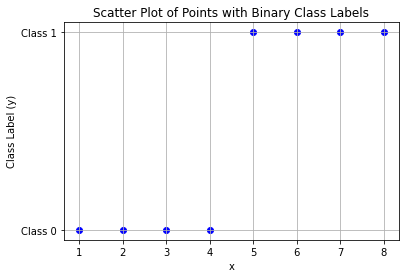

In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0, 0, 0, 0, 1, 1, 1, 1]

# Plotting graph
plt.scatter(x, y, color='blue', marker='o')
plt.title('Scatter Plot of Points with Binary Class Labels')
plt.xlabel('x')
plt.ylabel('Class Label (y)')
# 0 = Class 0 
# 1 = Class 1
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.grid(True)
plt.show()


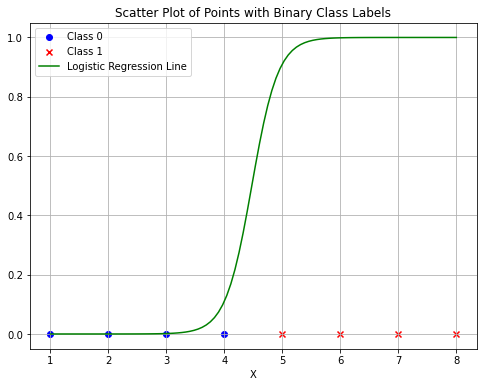

In [3]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression function with gradient descent
def gd(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    # epoch or iterations done in finding
    for _ in range(5000):
        y_hat = sigmoid(np.dot(X, weights))
        # weight updation (using dot product between (y-y_hat) and X )
        # x.shape[0] := means divided by total number of points
        # weight(new) = weight(old) - lr * (Summation of (y-y_hat)*xi)
        weights = weights + lr * (np.dot((y - y_hat), X) / X.shape[0])
    # return weights and intercept
    return weights[1:], weights[0]

# Function to plot points
def plot_points(X, y, title="Scatter Plot"):
    plt.figure(figsize=(8, 6))
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    plt.scatter(class_0, [0] * len(class_0), c='blue', label='Class 0', marker='o')
    plt.scatter(class_1, [0] * len(class_1), c='red', label='Class 1', marker='x')
    plt.title(title)
    plt.xlabel('X')
    plt.legend()
    plt.grid(True)

# Convert data to DataFrame
data = pd.DataFrame({'X': [1, 2, 3, 4, 5, 6, 7, 8], 'y': [0, 0, 0, 0, 1, 1, 1, 1]})

# Plot original points
plot_points(data['X'], data['y'], title="Scatter Plot of Points with Binary Class Labels")

# Train logistic regression using gradient descent
weights, bias = gd(data['X'].values.reshape(-1, 1), data['y'].values)

# Plot logistic regression line
x_range = np.linspace(min(data['X']), max(data['X']), 100)
log_reg_line = sigmoid(weights * x_range + bias)

plt.plot(x_range, log_reg_line, color='green', label='Logistic Regression Line')
plt.legend()

plt.show()


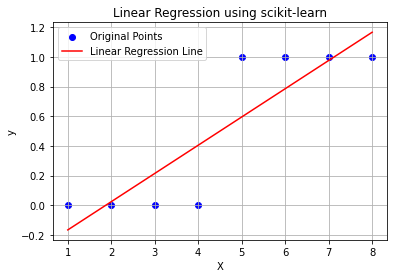

In [4]:
# Generate example data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)  # Reshape to make it a 2D array(Column wise)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the original points
plt.scatter(X, y, color='blue', marker='o', label='Original Points')

# Plot the linear regression line
x_range = np.linspace(min(X), max(X), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Linear Regression Line')

plt.title('Linear Regression using scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Linear Regression with Threshold value  = 0.5

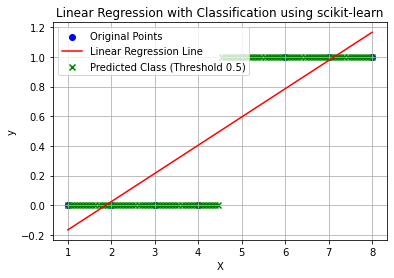

In [5]:
# Generate example data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the original points
plt.scatter(X, y, color='blue', marker='o', label='Original Points')

# Plot the linear regression line
x_range = np.linspace(min(X), max(X), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Linear Regression Line')

# Apply threshold of 0.5 and classify points as 1 or 0
threshold = 0.5
y_classified = (y_pred > threshold).astype(int)
plt.scatter(x_range, y_classified, color='green', marker='x', label='Predicted Class (Threshold 0.5)')

plt.title('Linear Regression with Classification using scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Confusion Matrix

Confusion Matrix:
[[4 0]
 [0 4]]


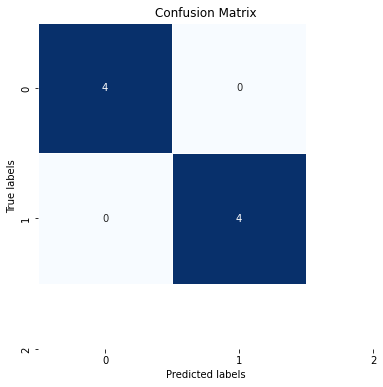

In [6]:
# Example true labels and predicted labels
x_true = [1, 2, 3, 4, 5, 6, 7, 8]
# Class labels
y_true = [0, 0, 0, 0, 1, 1, 1, 1]

# Create a linear regression model
model = LogisticRegression()

# Train the model
model.fit(X, y)

y_pred = model.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], linewidths=.5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [7]:
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print('precision_score :\n',precision_score(y_true,y_pred,pos_label=1))
print('recall_score :\n',recall_score(y_true,y_pred,pos_label=1))
print('classification_report :\n',classification_report(y_true,y_pred))

confusion matrix :
 [[4 0]
 [0 4]]
precision_score :
 1.0
recall_score :
 1.0
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [8]:
# Compute confusion matrix

cm = confusion_matrix(y_true, y_pred)
# Calculate sensitivity (true positive rate) = (ratio of true positives to the sum of true positives and false negatives)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
# Calculate specificity (true negative rate) = (ratio of true negatives to the sum of true negatives and false positives)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
# Calculate geometric mean
g_mean = np.sqrt(sensitivity * specificity)
print("Geometric Mean:", g_mean)

Geometric Mean: 1.0


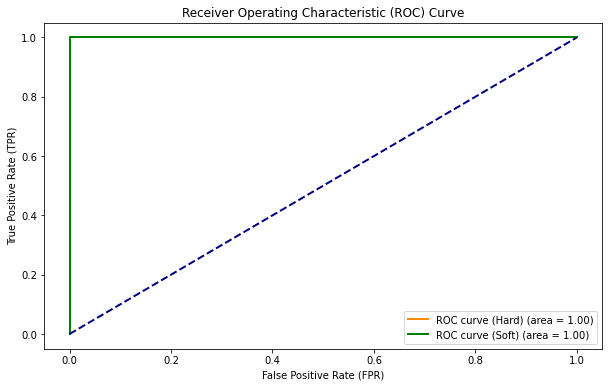

AUC (Hard): 1.0
AUC (Soft): 1.0


In [9]:
# Area under curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generate example data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X, y)

# Get hard predictions
y_pred_hard = model.predict(X)

# Get soft predictions (probabilities)
y_probs_soft = model.predict_proba(X)[:, 1]

# Calculate ROC curve for hard predictions
fpr_hard, tpr_hard, thresholds_hard = roc_curve(y, y_pred_hard)
roc_auc_hard = auc(fpr_hard, tpr_hard)

# Calculate ROC curve for soft predictions
fpr_soft, tpr_soft, thresholds_soft = roc_curve(y, y_probs_soft)
roc_auc_soft = auc(fpr_soft, tpr_soft)

# Plot ROC curves
plt.figure(figsize=(10, 6))

# Plot ROC curve for hard predictions
plt.plot(fpr_hard, tpr_hard, color='darkorange', lw=2, label='ROC curve (Hard) (area = {:.2f})'.format(roc_auc_hard))

# Plot ROC curve for soft predictions
plt.plot(fpr_soft, tpr_soft, color='green', lw=2, label='ROC curve (Soft) (area = {:.2f})'.format(roc_auc_soft))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUCs
print("AUC (Hard):", roc_auc_hard)
print("AUC (Soft):", roc_auc_soft)


In [10]:
#False Alarm Rate (FAR)
# FAR= FP/(FP+TN)
# Calculate False Alarm Rate (FAR)
far = cm[0, 1] / (cm[0, 1] + cm[0, 0])
# Print False Alarm Rate
print("False Alarm Rate (FAR):", far)

False Alarm Rate (FAR): 0.0


## Logistic Regression on standard dataset

In [11]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Separate features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Support Vector Machine

In [12]:
# Planning:
# Exactly same looping structure as of Linear Regression code (Lab 1)
# Same type of code
# First read that code of Lab 1 (if having problem and then read this)
# Looping Structure :
# loop-1 (datasets)
#             |-> loop-2 (degrees)
#                             |-> loop-3 (aphas)
#                                           |-> loop-4 (files in folder) 

import glob
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Function to perform SVM Regression with RBF kernel (Radial Basis Function) =  e^(-x^2)
def SVRRBFKernelMetrics(x_train, y_train, x_test, y_test, C, gamma):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    svr = SVR(kernel='rbf', C=C, gamma=gamma)
    svr.fit(x_train_scaled, y_train)

    y_pred = svr.predict(x_test_scaled)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return rmse, mae, r2


folders = ["diabetes-5-fold", "machineCPU-5-fold", "mortgage-5-fold"]

for folder in folders:
    print(folder)

    # Define the file pattern
    file_pattern = "*tra.dat"
    training_files = glob.glob("./" + folder + "/" + file_pattern)
    file_pattern = "*tst.dat"
    testing_files = glob.glob("./" + folder + "/" + file_pattern)

    alpha_values = [2 ** i for i in range(0, 2, 2)]
    degree = [2, 3]

    for d in degree:
        svm_map = {}

        for C in alpha_values:
            for gamma in alpha_values:
                trmse = 0
                tmae = 0
                tr2 = 0

                for train_file, test_file in zip(training_files, testing_files):
                    df = pd.read_csv(train_file, delimiter=',', header=None, comment='@')
                    df_test = pd.read_csv(test_file, delimiter=',', header=None, comment='@')

                    x_train = df.iloc[:, :-1]
                    y_train = df.iloc[:, -1]
                    x_test = df_test.iloc[:, :-1]
                    y_test = df_test.iloc[:, -1]
                    
                    # SVM applied with RBF Kernel
                    rmse, mae, r2 = SVRRBFKernelMetrics(x_train, y_train, x_test, y_test, C, gamma)

                    trmse += rmse
                    tmae += mae
                    tr2 += r2

                trmse /= 5
                tmae /= 5
                tr2 /= 5

                svm_map[(folder, d, C, gamma)] = (trmse, tmae, tr2)

#         Print or store the results as needed
        for key, values in svm_map.items():
            print(f"{key}: RMSE={values[0]}, MAE={values[1]}, R2={values[2]}")


diabetes-5-fold
('diabetes-5-fold', 2, 1, 1): RMSE=0.6579940689305427, MAE=0.5337817719631255, R2=-0.06324666230007774
('diabetes-5-fold', 3, 1, 1): RMSE=0.6579940689305427, MAE=0.5337817719631255, R2=-0.06324666230007774
machineCPU-5-fold
('machineCPU-5-fold', 2, 1, 1): RMSE=161.9676487298688, MAE=72.45962069296318, R2=-0.06903266408142983
('machineCPU-5-fold', 3, 1, 1): RMSE=161.9676487298688, MAE=72.45962069296318, R2=-0.06903266408142983
mortgage-5-fold
('mortgage-5-fold', 2, 1, 1): RMSE=0.37257936831601435, MAE=0.1607483990513203, R2=0.9852485105958134
('mortgage-5-fold', 3, 1, 1): RMSE=0.37257936831601435, MAE=0.1607483990513203, R2=0.9852485105958134


In [10]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.6 MB/s eta 0:00:001.7 MB/s eta 0:00:01
